In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
from google.colab import drive

In [9]:
!pip install kaggle  
from google.colab import files  
files.upload()  
!mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/    
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits
#구글 드라이브에 캐글 데이터 다운로드
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/data/.kaggle/"   
from google.colab import drive  
drive.mount('/content/gdrive')  
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip  
!ls
!pip install gdown

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/129_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/130_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/131_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/132_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/133_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/134

In [10]:
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fruits.zip
replace fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/fruits-360_dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
np.random.seed(1234)
directory="/content/fruits-360_dataset/fruits-360/Training/"
classes=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [13]:
directory2="/content/fruits-360_dataset/fruits-360/Test/"
classes2=classes

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

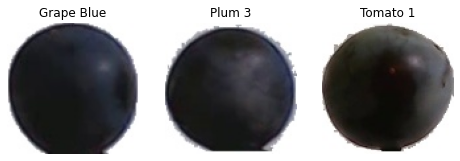

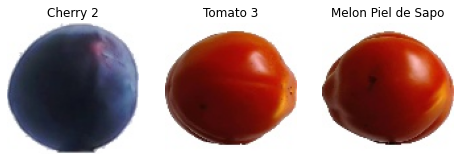

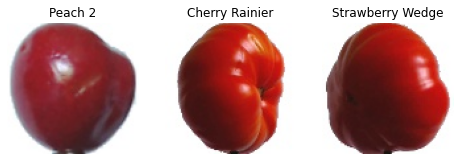

In [14]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [15]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [16]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (7050, 100, 100, 3)
shape of X_test=   (2354, 100, 100, 3)


In [17]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [18]:
Y_train.shape

(7050, 9)

In [19]:
X_train.shape

(7050, 100, 100, 3)

In [20]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
hist=model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val))

Epoch 1/10
314/314 [==============================] - 16s 16ms/step - loss: 0.5824 - accuracy: 0.7920 - val_loss: 0.2602 - val_accuracy: 0.9440
Epoch 2/10
314/314 [==============================] - 4s 14ms/step - loss: 0.0918 - accuracy: 0.9691 - val_loss: 0.0642 - val_accuracy: 0.9823
Epoch 3/10
314/314 [==============================] - 5s 14ms/step - loss: 0.0583 - accuracy: 0.9801 - val_loss: 0.0464 - val_accuracy: 0.9993
Epoch 4/10
314/314 [==============================] - 4s 14ms/step - loss: 0.0430 - accuracy: 0.9871 - val_loss: 0.1729 - val_accuracy: 0.9468
Epoch 5/10
314/314 [==============================] - 4s 14ms/step - loss: 0.0384 - accuracy: 0.9865 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 6/10
314/314 [==============================] - 4s 14ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7/10
314/314 [==============================] - 4s 14ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0064 - val_accuracy: 1.000

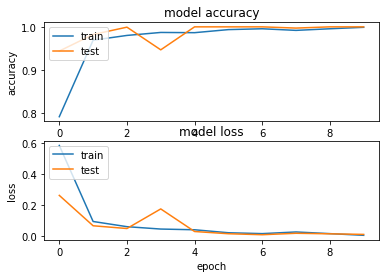

In [23]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(hist.history['accuracy'])  
plt.plot(hist.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

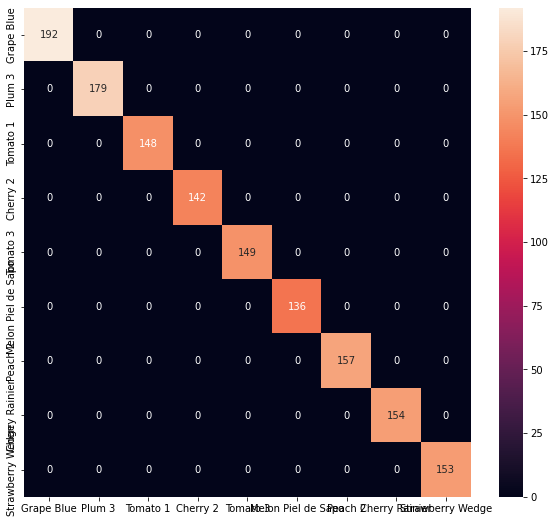

In [26]:
#val_data의 confusion matrix 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

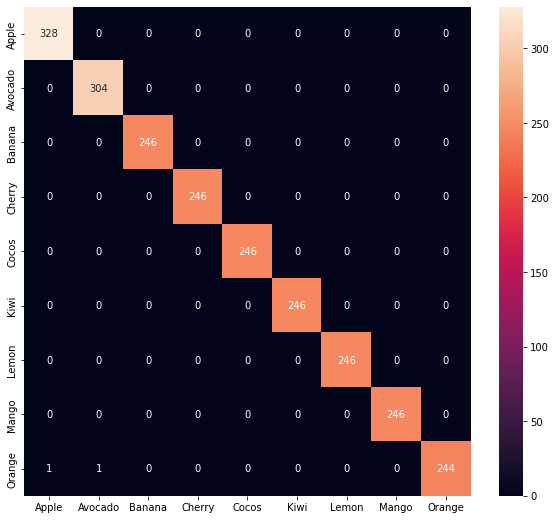

In [25]:
#test 의confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()